# Tensorflow basis

## Example 1

Eager calculations in tensorflow

Add two variables a = 1 and b = 10


In [ ]:
# Example
import numpy as np
import tensorflow as tf

print(tf.executing_eagerly())

a = tf.Variable(1)
b = tf.Variable(10)
c = a + b
print(c.numpy())

True
11


## Example 2


In [ ]:
# Example
import numpy as np
import tensorflow as tf

@tf.function
def add(a,b):
  return a + b

def sub(a,b):
  return a - b

a = tf.Variable(5)
b = tf.Variable(6)
c = tf.Variable(1)

x = add(a,sub(b,c))
print(x.numpy())


10


# Task 1

Calculate by Tensorflow folowing expression $y = a * b + c$.

a,b, and c are 2x2 matrixes. Numbers in matrixes depends on your choice.
Multiplication is elementwise.


In [ ]:
# Write your code here

import numpy as np
import tensorflow as tf

@tf.function
def multiply(a,b):
  return tf.multiply(a, b)

@tf.function
def add(a,b):
  return tf.add(a, b)

a = tf.Variable([[1,2],
                [3,4]])
b = tf.Variable([[1,2],
                [3,4]])
c = tf.Variable([[1,2],
                [3,4]])

x = multiply(a,b)
print(x.numpy())


[[ 1  4]
 [ 9 16]]


In [ ]:
# Write your code here

# Example 3

Draw a graf of the function $y=f(x)=x^2$ and its derivatice $y'=f'(x). Use Tensoflow for derivative calculation.

[9. 4. 1. 0. 1. 4. 9.]
[-6. -4. -2.  0.  2.  4.  6.]


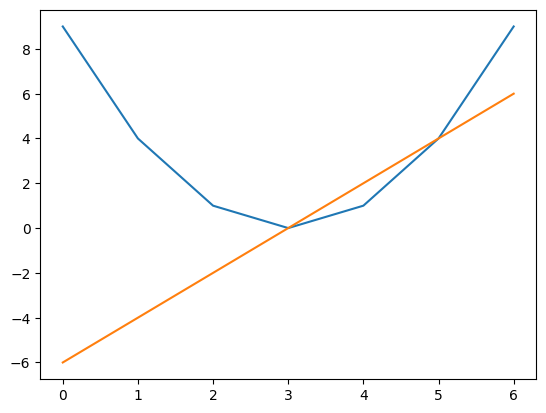

In [ ]:
# Example
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

@tf.function
def f(x):
  y = x*x
  return y

@tf.function
def dfdx(x):
  y = f(x)
  return tf.gradients(y, x)[0]

x = tf.Variable([-3.,-2.,-1.,0.,1.,2.,3.])
print(f(x).numpy())
print(dfdx(x).numpy())

plt.plot(f(x))
plt.plot(dfdx(x))

# Task 2

Draw a graf of the function $y=\sigma(x)=\frac{1}{1+e^{-x}}$ and its derivative $y'=s'(x)$. Use Tensoflow for derivative calculation.

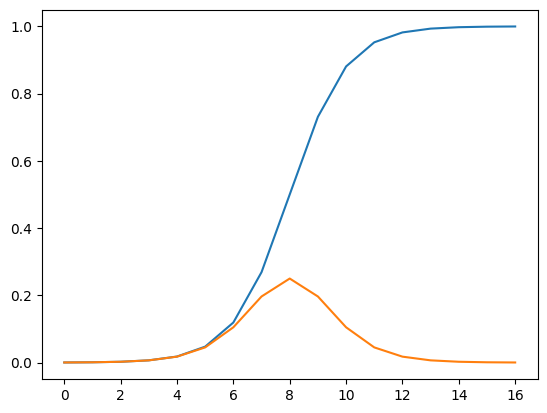

In [ ]:
# Write your code here

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

@tf.function
def f(x):
  y = 1/(1+tf.exp(-x))
  return y

@tf.function
def dfdx(x):
  y = f(x)
  return tf.gradients(y, x)[0]

x = tf.Variable([-8.,-7.,-6.,-5.,-4.,-3.,-2.,-1.,0.,1.,2.,3.,4.,5.,6.,7.,8.])


plt.plot(f(x))
plt.plot(dfdx(x))

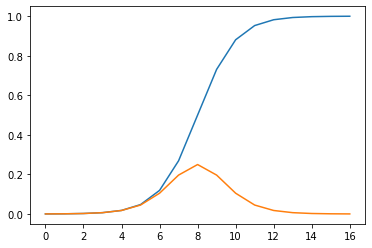

In [ ]:
# Write your code here

# Task 3

Calculate the gradient of function $y=g(x,y)=e^{-\frac{x^2+y^2}{2\sigma^2}}$ for $\sigma^2 = 0.5\;\mbox{and}\;x = 1\;\mbox{and}\;y = 1$

In [ ]:
# Write your code here

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


x_1 = tf.Variable(1.0)
y_1 = tf.Variable(1.0)
sigma2 = tf.Variable(0.5)


@tf.function
def g(x, y):
  n = (x**2 + y**2)/(2*sigma2)
  g = tf.exp(-n)
  return g

@tf.function
def df(x,y):
  with tf.GradientTape() as tape:
    val = g(x, y)
  dg_dx, dg_dy = tape.gradient(val, [x, y])

  return [dg_dx, dg_dy]


print(df(x_1, y_1))


[<tf.Tensor: shape=(), dtype=float32, numpy=-0.2706705629825592>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.2706705629825592>]


In [ ]:
# Write your code here

[<tf.Tensor: shape=(), dtype=float32, numpy=-0.27067056>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.27067056>]


# Task 4

Create a simple neural feed forward neural network using Tensorflow.

Input layer -> hidden layer -> output layer

for IRIS dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "Output[0]", "Output[1]", "Output[2]"]

iris_data = pd.read_csv('/content/drive/MyDrive/A_USB/502/Lab_2/iris-enc.csv', names=columns)
iris_data

,sepal_length,sepal_width,petal_length,petal_width,Output[0],Output[1],Output[2]
0,5.1,3.5,1.4,0.2,0,0,1
1,4.9,3.0,1.4,0.2,0,0,1
2,4.7,3.2,1.3,0.2,0,0,1
3,4.6,3.1,1.5,0.2,0,0,1
4,5.0,3.6,1.4,0.2,0,0,1
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1,0,0
146,6.3,2.5,5.0,1.9,1,0,0
147,6.5,3.0,5.2,2.0,1,0,0
148,6.2,3.4,5.4,2.3,1,0,0


In [ ]:
iris_features = iris_data.iloc[:, 0:4].to_numpy()
iris_desired = iris_data.iloc[:, 4:].to_numpy()

iris_features.min(axis=0), iris_features.max(axis=0), iris_desired.min(axis=0), iris_desired.max(axis=0)

y_max = iris_desired.max(axis=0)
y_min = iris_desired.min(axis=0)
x_max = iris_features.max(axis=0)
x_min = iris_features.min(axis=0)

print(f'Maximum input values: {x_max}')



Maximum input values: [7.9 4.4 6.9 2.5]


In [ ]:
iris_features_norm = (iris_features - iris_features.min(axis=0)) / (iris_features.max(axis=0) - iris_features.min(axis=0))
iris_features_norm

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
from sklearn.model_selection import train_test_split


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_features_norm,
    iris_desired,
    test_size=0.2,
    random_state=42,
    shuffle=True,
    stratify=iris_desired
)

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape :", X_test.shape, y_test.shape)


Train shape: (120, 4) (120, 3)
Test shape : (30, 4) (30, 3)


In [ ]:
model = models.Sequential([
    layers.Input(shape=(4,)),
    layers.Dense(8, activation='relu'),
    layers.Dense(3, activation='softmax')
])


In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
model.fit(X_train, y_train, epochs=150, batch_size=8, verbose=1)


Epoch 1/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3518 - loss: 1.2205
Epoch 2/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2920 - loss: 1.1944 
Epoch 3/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3321 - loss: 1.1308 
Epoch 4/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3986 - loss: 1.0924 
Epoch 5/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4622 - loss: 1.0468 
Epoch 6/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7097 - loss: 1.0254 
Epoch 7/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6659 - loss: 1.0118 
Epoch 8/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7133 - loss: 0.9669 
Epoch 9/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6975 - loss: 0.9340 
Epoch 10/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6282 - loss: 0.9268 
Epoch 11/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6869 - loss: 0.8817 
Epoch 12/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step -

In [ ]:
loss, acc = model.evaluate(X_test, y_test)
print("Loss:", loss, "Accuracy:", acc)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step - accuracy: 0.9667 - loss: 0.2012
Loss: 0.2011842429637909 Accuracy: 0.9666666388511658


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report


y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

y_true = y_test.flatten()
y_pred_classes = y_pred_classes.flatten()

probs = model.predict(X_test)

y_pred_labels = probs.argmax(axis=1)
y_true_labels = y_test.argmax(axis=1)

cm = confusion_matrix(y_true_labels, y_pred_labels, labels=[0,1,2])

print("Confusion Matrix:\n", cm)

print("\nClassification Report:\n",
      classification_report(y_true_labels, y_pred_labels, target_names=['class0','class1','class2']))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Confusion Matrix:
 [[10  0  0]
 [ 1  9  0]
 [ 0  0 10]]

Classification Report:
               precision    recall  f1-score   support

      class0       0.91      1.00      0.95        10
      class1       1.00      0.90      0.95        10
      class2       1.00      1.00      1.00        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

